# Homework 1 (Linear Regression)

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality), and contains the following attributes about red wine:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dixoide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol (%)
- quality

We adjusted the dependent variable, 'quality', to make it a little more continuous.

### __Problem Statement__

Let's say we are part of a data science team that is contracted out as consultants for different companies. In this scenario, we have been assigned a contract with a red wine company which makes a special Cougar Red Blend wine. They have a number of different varieties, each given different quality scores. The wine company has collected different characteristics about their different wines over the years, but they want to know how these variables impact a wine's quality rating. They have no idea what tools to use to do this!

In general, the company would like to know:

- Which variables are significant in predicting the quality of a Cougar Red Blend
- How well those variables describe the quality of the wine

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW1.ipynb

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

### __Part 2. Reading and Understanding the Data__ ###

Import the data using Pandas into a dataframe named `wine_df`. Then, display the first 5 rows

In [2]:
wine_df = pd.read_csv('wine_quality.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.182611
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,4.874886
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,4.755772
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5.783057
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.199293


Print some basic statistics of the data

In [3]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.638044
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.818458
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,2.948026
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.017043
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,5.786944
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.096932
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.240683


Create the correlation matrix using Pandas, then using Seaborn, plot a heatmap of the correlation matrix that looks similar to the one below.

HINT: Look at [Matplotlib color map options](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to see if you can find a good color scheme for your heatmap to make it more understandable, and play around with different values of the seaborn heatmap function

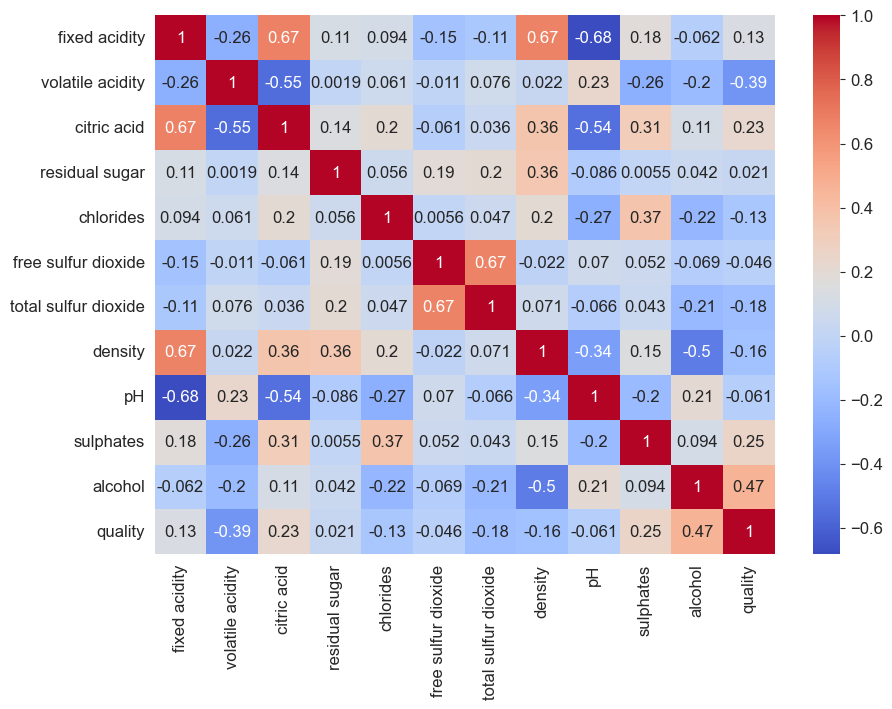

In [4]:
# I played around with "Spectral", "twilight", and "coolwarm" in the cmap argument

sns.heatmap(wine_df.corr(), annot = True, cmap = "coolwarm")
plt.show()

__Q1__: Does this reveal anything interesting for us? If so, what?

#### My answer:
Although most of the variables appear to have a weak negative or no correlation with the quality of Cougar Red Blend, alcohol has a moderate strong positive correlation with the quality of Red Blend. This means that alcohol content is more significant in predicting the quality of Red Blend since it has the strongest positive correlation to quality than the other variables. The heat map also reveals that there is a relatively strong positive correlation between red wine density and fixed acidity. Additionally, there is a relatively strong positive correlation between red wine citric acid content and fixed acidity. However, there is a relatively strong negative correlation between red wine pH content and fixed acidity.

Using Seaborn regplots, plot *__each__* feature in the same style as the plot below. (Use a for loop. There should be 11 plots like the one below. Try experimenting with different colors, too!)

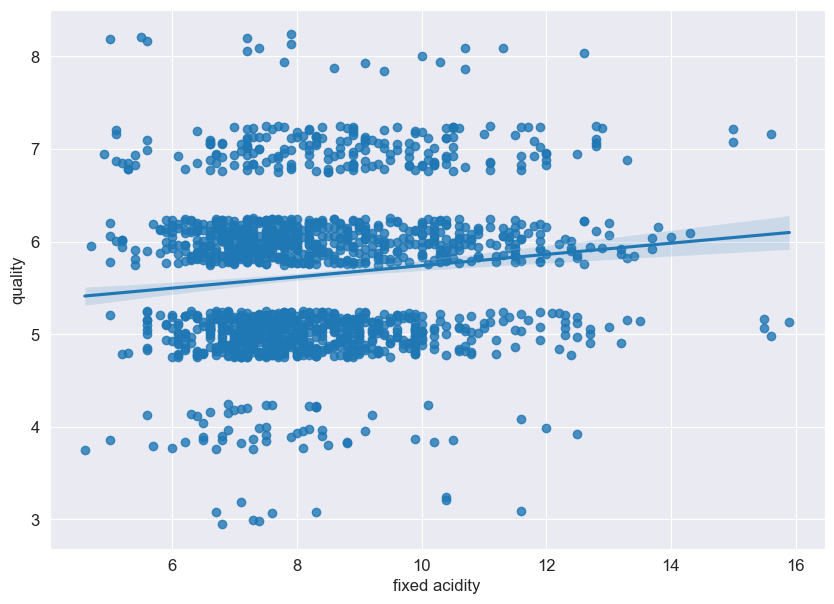

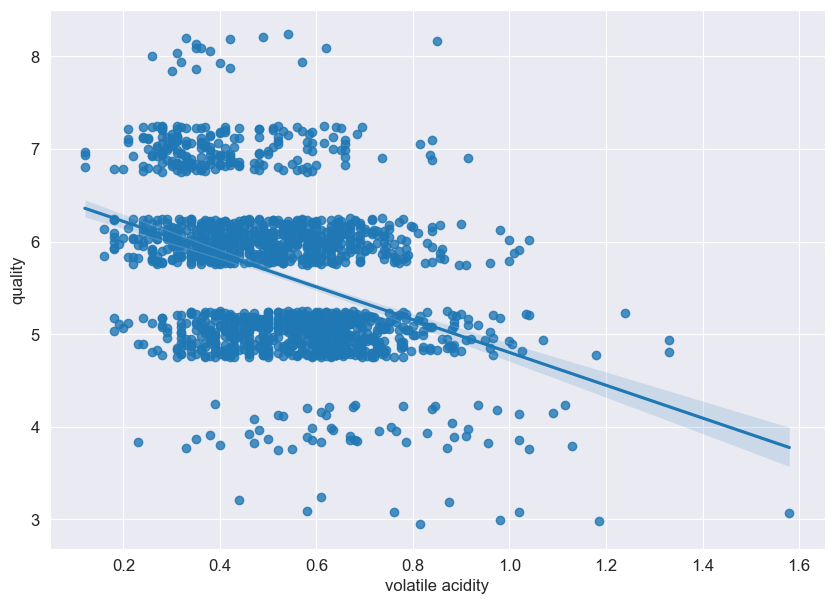

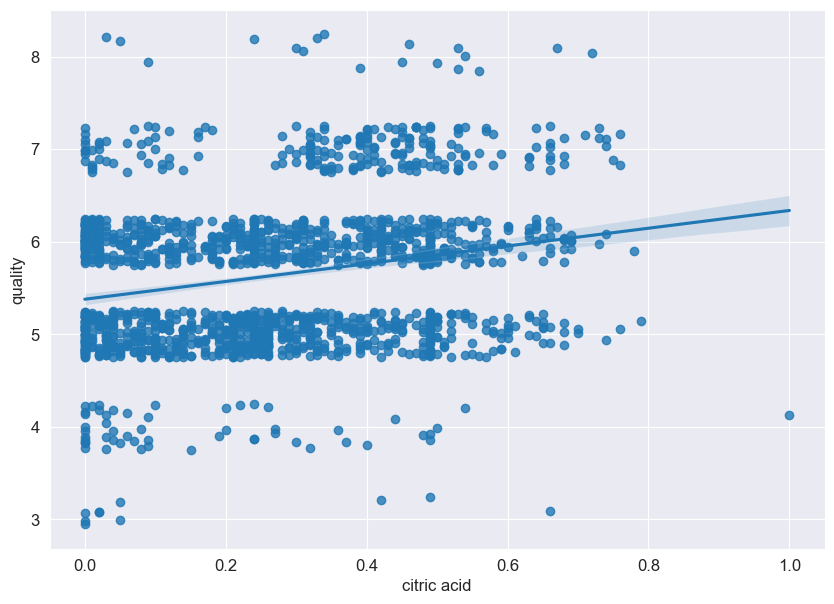

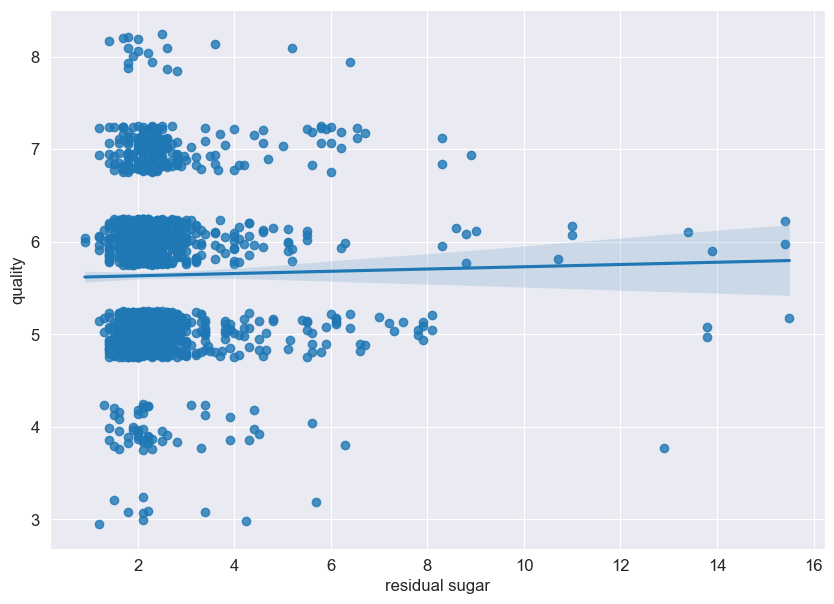

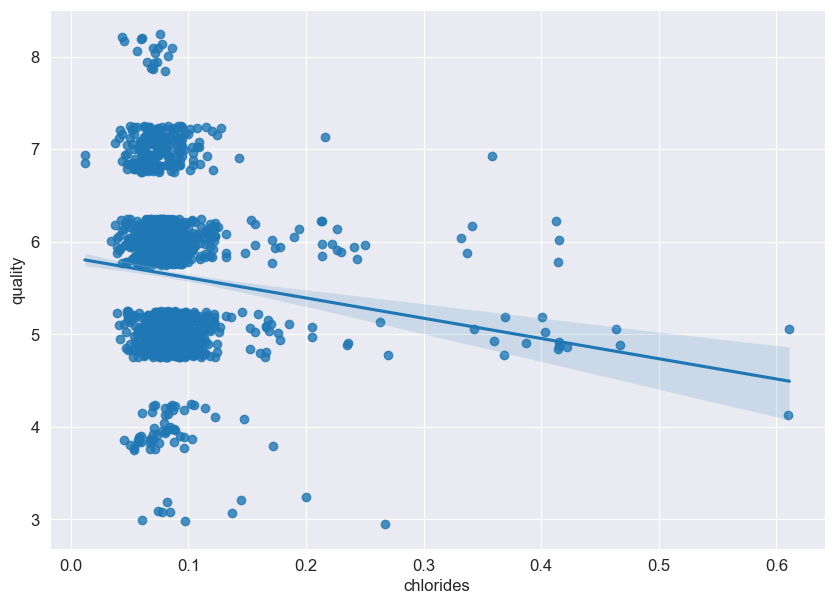

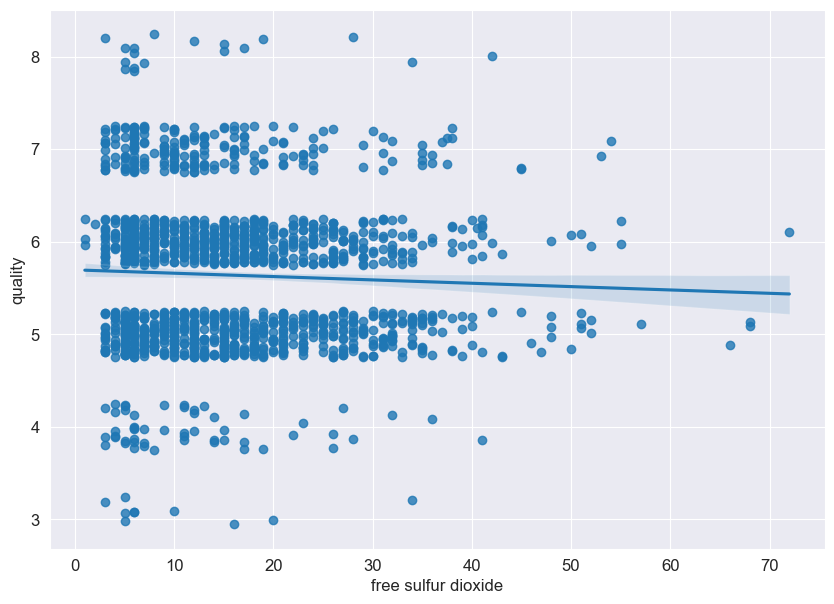

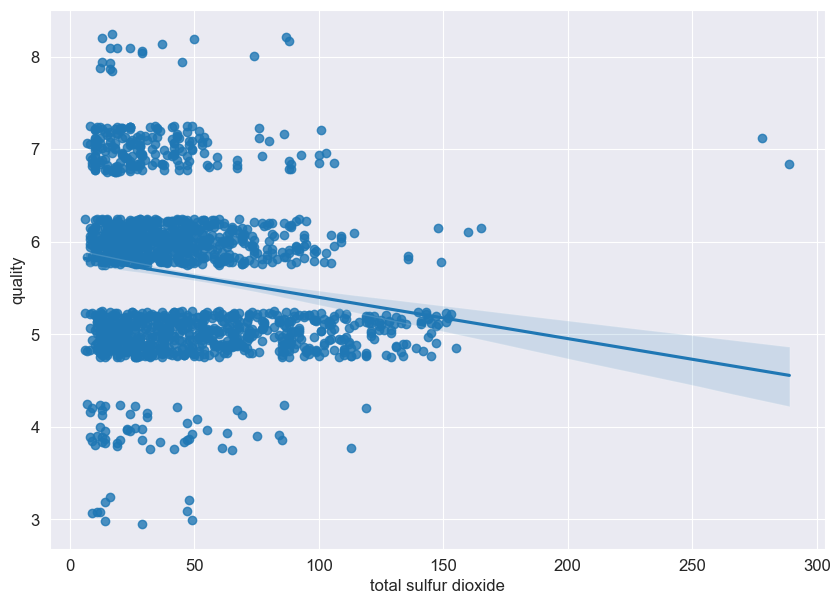

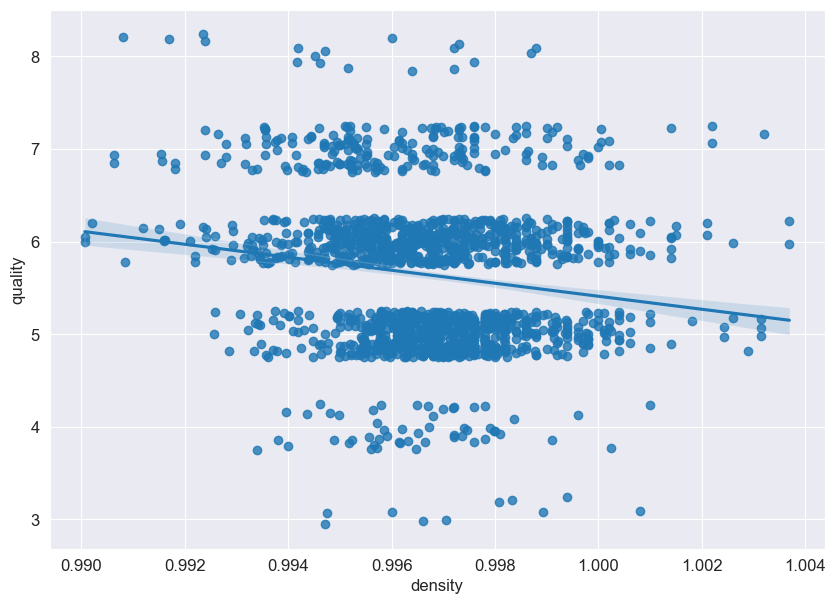

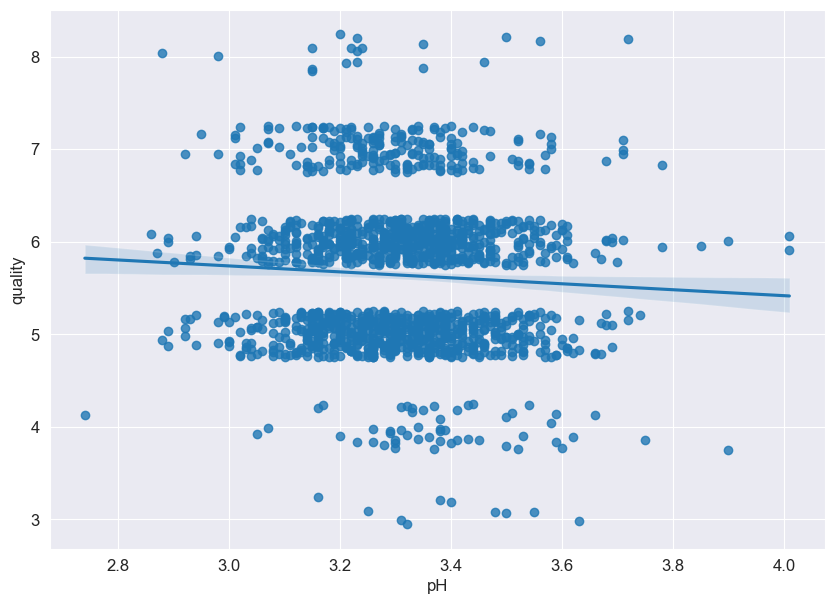

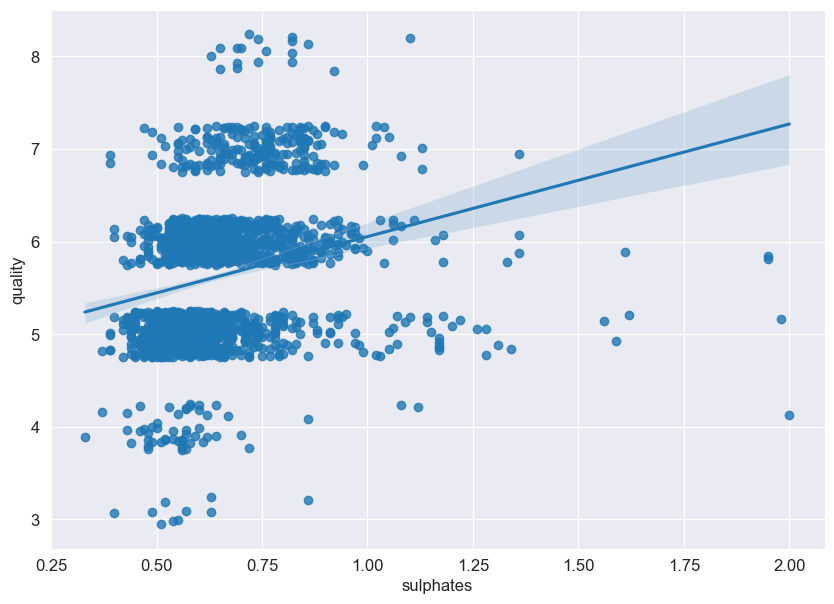

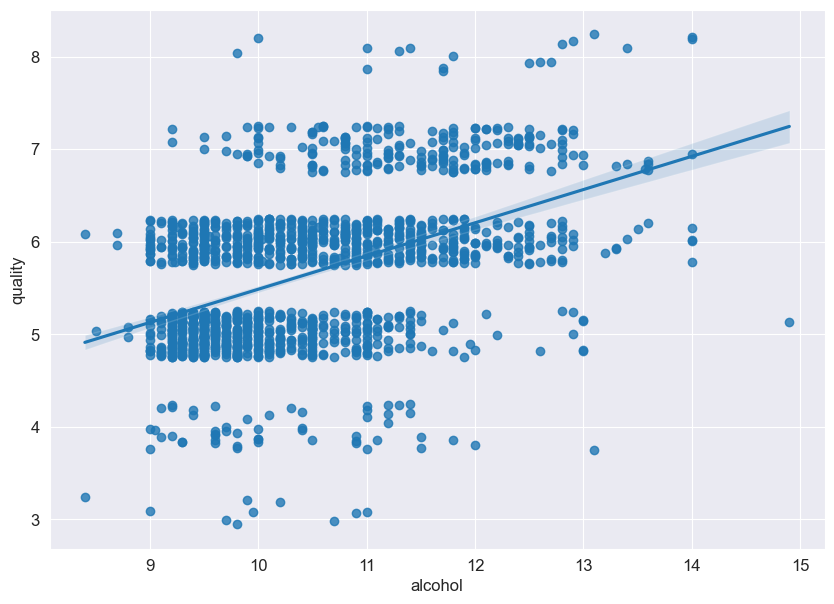

In [5]:
# Get all of the columns besides "quality"
features = wine_df.iloc[:, : 11].columns

for feature in features:
    sns.regplot(x = feature, y = 'quality', data = wine_df)
    plt.show()

__Q2__: Is there anything that sticks out? What features seem to have the strongest relationship with quality?


#### My answer:

The features that have the strongest positive relationship with quality are sulphates and alcohol. The feature that has the strongest negative relationship with quality is volatile acidity. The slope of the relationship between sulphates and quality is about two times the slope of the relationship between citric acid and quality, despite both citric acid and sulphates having heatmap values close to each other (± .02) when both are compared to quality. 

__Q3__: How do these findings compare with your conclusions gathered from the correlation matrix?

#### My answer:

For the most part, the findings were comparable to the conclusions gathered from the correlation matrix. For instance, both alcohol and volatile acidity had the largest positive and negative color values on the heatmap (.47 and -.39 respectively) when compared to quality and also had the steepest slopes in their relationship graphs. However, both chlorides and density had color values of -.13 and -.16 respectively when compared to quality, but the relationship between chloride and quality was stronger than the relationship between density and qualtiy. The regplot outlines this by displaying a steeper negative slope.

### __Part 3. Data Cleaning and Preparation for Analysis__

Use Pandas to find if there are any missing values in the data set

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


__Q4:__ If there were missing values, how do you think you would deal with them in this data set?





#### My answer:

If there were missing values in some of the dataset columns, I would deal with the missing values by obtaining the median value of each column, and replacing the missing values in each column of the dataset with its median. I would use the median since it is less sensitive to outliers in the data set and replaces the missing values with a neutral value. 

__Q5:__ Are there any categorical features in the data set? If so, which ones are they?

(HINT: Remember, Categorical variables are those whose numbers are representations of a certain category. For example, if there is a "Gender" feature, we might change all "male" values to 1 and all "female" values to 2. In this sense, the numbers don't have any real meaning, but are a way we can turn non-numerical attributes into numbers that we can then use in our models.)

In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


#### My answer:

Referring to my line of code above where I call .info() on my data frame, we can see that none of the data types are of type "object". Thus, there are no categorical features in this data set. All of the features are numerical features.

Using Pandas replace, encode any categorical variables accordingly. 

In [8]:
print("There are no categorical variables to encode.")

There are no categorical variables to encode.


In order to run the models, we will create a Pandas dataframe `X`, containing the independent variables, and an array of the dependent variable, `y`. But before we do that, we should scale our data. 

However, what's the best way to scale?

First, let's create an `X_unscaled` Pandas dataframe from our `wine_df` dataframe. Then, create a `y_unscaled` Pandas series of the dependent variable, 'quality'.

In [9]:
X_unscaled = wine_df.drop(columns = ['quality'])
y_unscaled = wine_df['quality']
print(f'X_unscaled columns: {list(X_unscaled.columns)}')

X_unscaled columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Next, use Sci-Kit Learn's MinMaxScaler and StandardScaler (imported above) to create new sets of pandas dataframes from `X_unscaled`:
- `X_mm` (Using MinMaxScaler)
- `X_ss` (Using StandardScaler)

** The Scaler functions output 2D arrays, so you will need to turn them back into Pandas Dataframes, which can be passed directly to the Linear Regression function.

__Q6__: What statistical assumption does the Standard Scaler make about the data? Why might this be important?



#### My answer:

The Standard Scaler assumes that the data follows a normal distribution. This means that the data should have a bell-shaped curve if it is plotted on a graph. This is important because many machine learning models assume that the input features are normally distributed or at least close to it. If the data is not normally distributed, the model might have trouble learning the relationship between the features and the target variable, leading to lower accuracy.

__Q7__: What do you think the effect will be on using Linear Regression on differently scaled (or unscaled) data?

#### My answer:

If the data is not scaled, and there is a large difference in the scale of the features, some features may dominate the model and have a greater impact on the prediction, even if they are not the most important features. This may result in the model generating inaccurate predictions of the target variable. For instance, if we take both total sulfur dioxide and free sulfur dioxide, both have standard deviations of around 32 and 10 respectively, meaning that they may contain outliers that skew the data.

In [10]:
# StandardScaler
scaler_ss = StandardScaler()
X_ss = scaler_ss.fit_transform(X_unscaled)
X_ss = pd.DataFrame(X_ss, columns=X_unscaled.columns)
print("X_ss")
X_ss.head()

X_ss


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [11]:
# MinMaxScaler
scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X_unscaled)
X_mm = pd.DataFrame(X_mm, columns=X_unscaled.columns)
print("X_mm")
X_mm.head()

X_mm


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


Our final task before performing Linear Regression is to separate our data into training and testing sets. We have 3 different X dataframes, each with the same data but scaled differently:
- `X_unscaled`
- `X_ss`
- `X_mm`

Use Sci-Kit Learn's train_test_split function to create a training and testing set for each of the 3 data sets (Use `y_unscaled` for each of the data sets):
- `train_X_unscaled`, `train_y_unscaled`, `test_X_unscaled`, `test_y_unscaled`
- `train_X_ss`, `train_y_ss`, `test_X_ss`, `test_y_ss`
- `train_X_mm`, `train_y_mm`, `test_X_mm`, `test_y_mm`

Use a train/test split of 80/20

In [12]:
# For unscaled data
train_X_unscaled, test_X_unscaled, train_y_unscaled, test_y_unscaled = train_test_split(X_unscaled, y_unscaled, test_size=0.2)

# For scaled data using MinMaxScaler
train_X_mm, test_X_mm, train_y_mm, test_y_mm = train_test_split(X_mm, y_unscaled, test_size=0.2)

# For scaled data using StandardScaler
train_X_ss, test_X_ss, train_y_ss, test_y_ss = train_test_split(X_ss, y_unscaled, test_size=0.2)

### __Part 4: Model Creation and Evaluation__

Now, we have 3 sets of data sets, and we will use each of them to do Linear Regression modelling. For *__each__* of the 3 data sets, do the following (the output of using unscaled data is below):

1. Create a Sci-kit Learn Linear Regression model, and train (fit) it on the training data.
2. Use this model to predict quality values for the corresponding test_X values, and save these test predictions as `predictions`.
3. Use `predictions` and `test_y` values to calculate `residuals`
4. Create a Seaborn scatter plot of the true quality vs. the predicted quality of the test set.
5. Create a Seaborn histogram of the residuals.
6. Print the $R^{2}$ value using the test values.

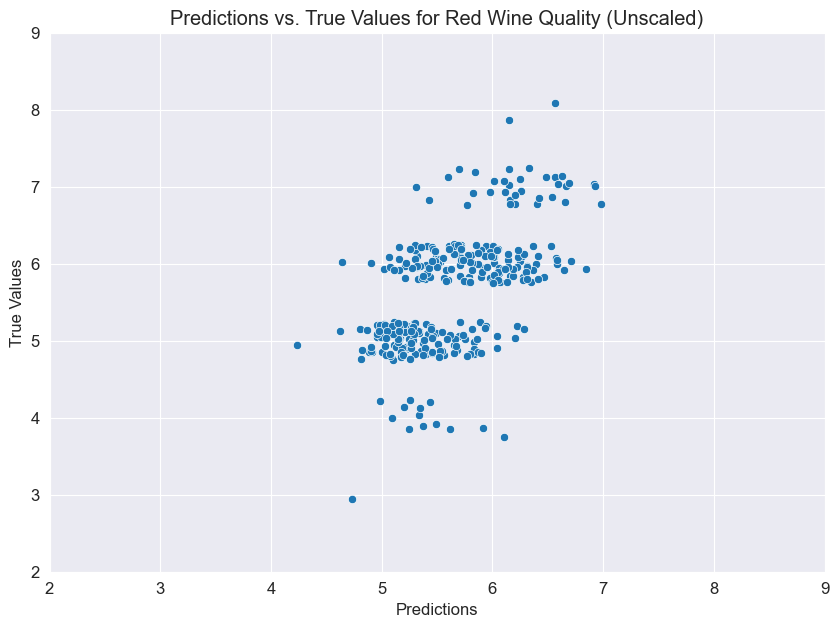

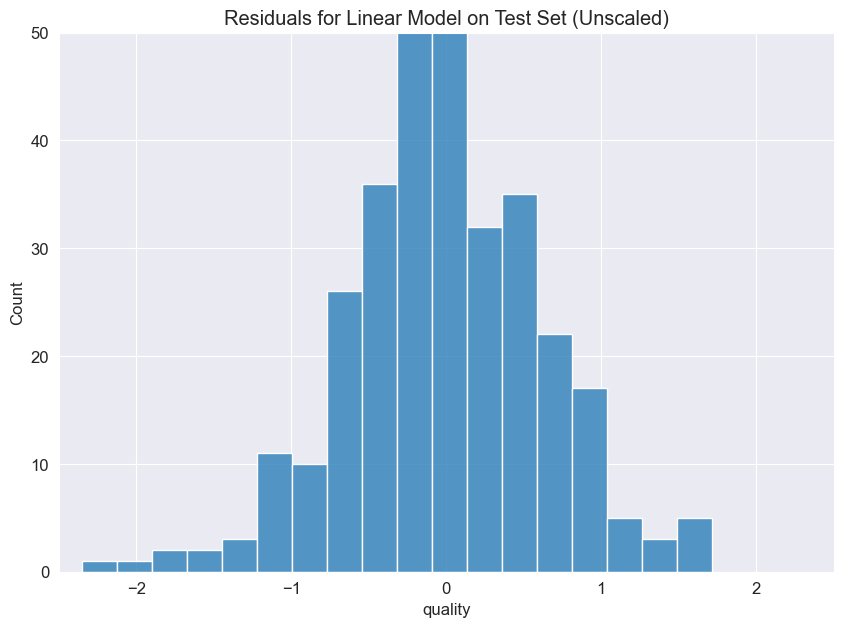

R-squared value (Unscaled): 0.3255061348434488


In [13]:
# Linear Regression Model (unscaled)
lm = LinearRegression()
lm.fit(train_X_unscaled, train_y_unscaled)
predictions = lm.predict(test_X_unscaled)
residuals = test_y_unscaled - predictions

# Scatterplot (unscaled)
sns.scatterplot(x = predictions, y = test_y_unscaled)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Predictions vs. True Values for Red Wine Quality (Unscaled)')
plt.xlim([2, 9])
plt.ylim([2, 9])
plt.show()

# Histogram (unscaled)
sns.histplot(residuals)
plt.ylabel('Count')
plt.title('Residuals for Linear Model on Test Set (Unscaled)')
plt.ylim([0, 50])
plt.xlim([-2.5, 2.5])
plt.show()

# R^2 value (unscaled)
print(f'R-squared value (Unscaled): {r2_score(test_y_unscaled, predictions)}')

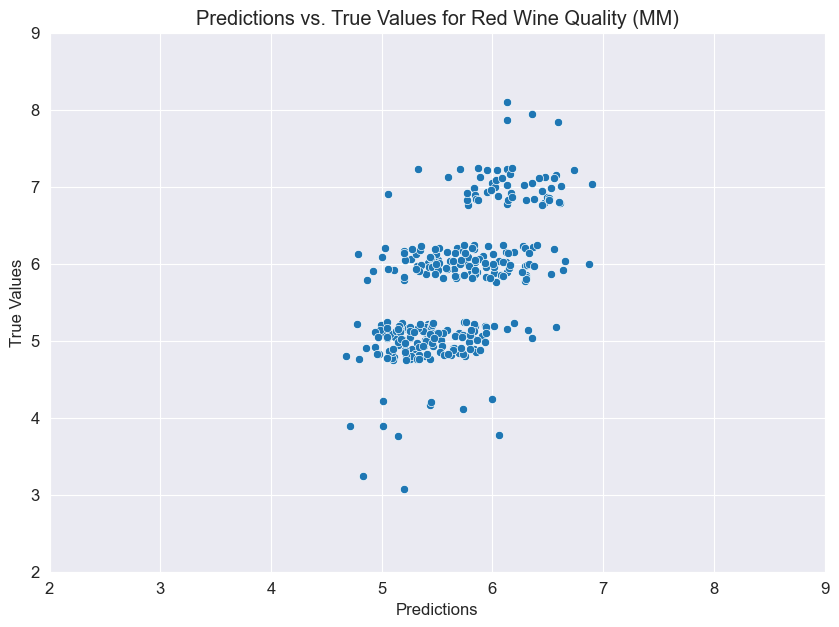

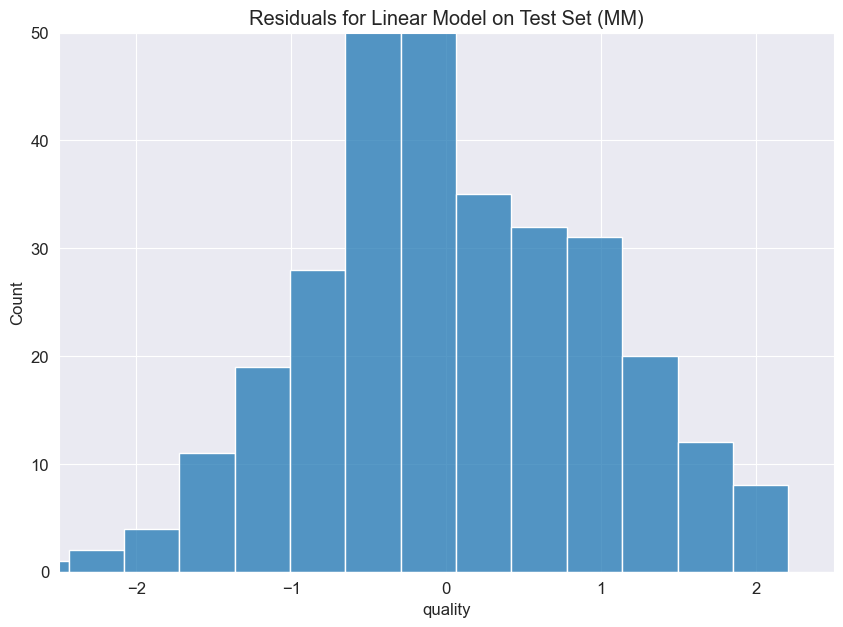

R-squared value (MM): 0.3476452912576764


In [14]:
# Linear Regression Model (MM)
lm_mm = LinearRegression()
lm_mm.fit(train_X_mm, train_y_mm)
predictions_mm = lm_mm.predict(test_X_mm)
residuals_mm = test_y_mm - predictions

# Scatterplot (MM)
sns.scatterplot(x = predictions_mm, y = test_y_mm)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Predictions vs. True Values for Red Wine Quality (MM)')
plt.xlim([2, 9])
plt.ylim([2, 9])
plt.show()

# Histogram (MM)
sns.histplot(residuals_mm)
plt.ylabel('Count')
plt.title('Residuals for Linear Model on Test Set (MM)')
plt.ylim([0, 50])
plt.xlim([-2.5, 2.5])
plt.show()

# R^2 value (MM)
print(f'R-squared value (MM): {r2_score(test_y_mm, predictions_mm)}')

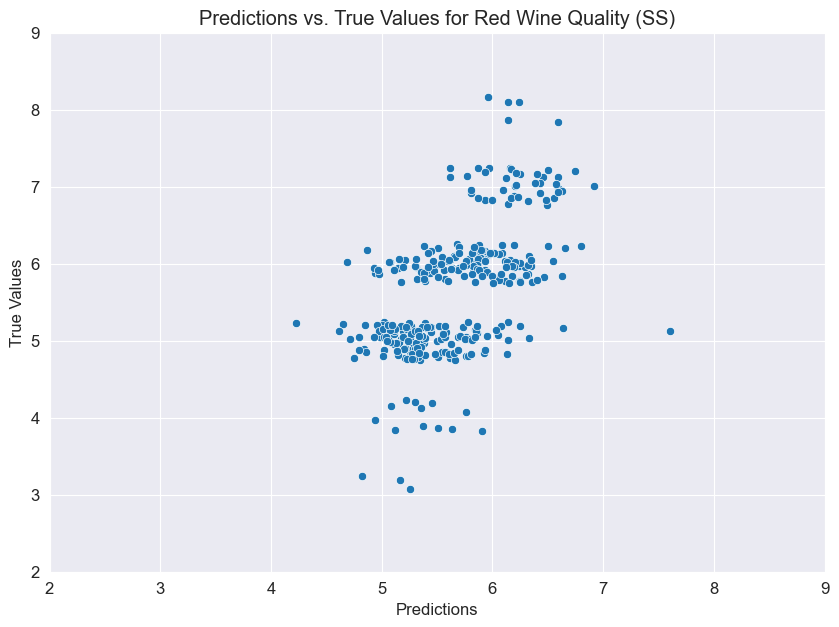

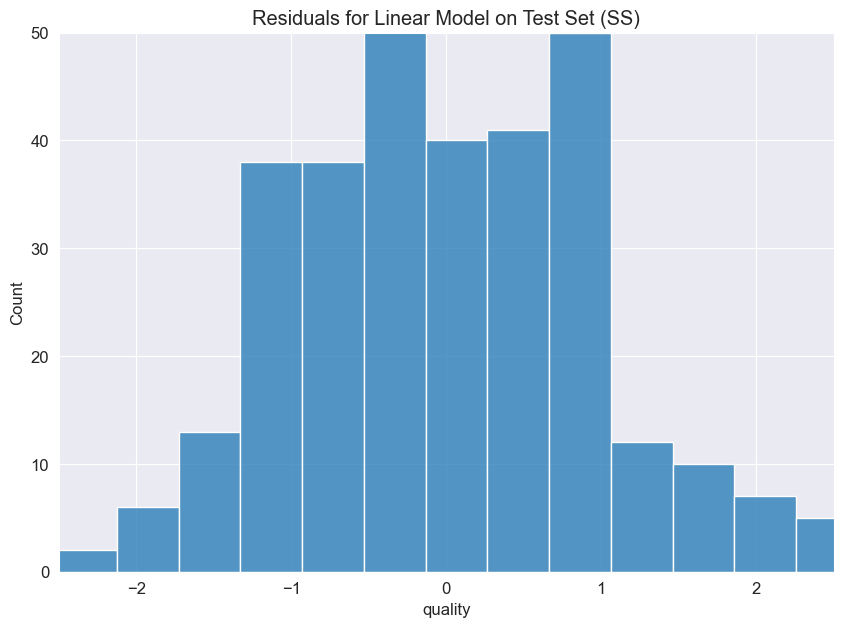

R-squared value (SS): 0.3086599982682644


In [15]:
# Linear Regression Model (SS)
lm_ss = LinearRegression()
lm_ss.fit(train_X_ss, train_y_ss)
predictions_ss = lm_ss.predict(test_X_ss)
residuals_ss = test_y_ss - predictions

# Scatterplot (SS)
sns.scatterplot(x = predictions_ss, y = test_y_ss)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Predictions vs. True Values for Red Wine Quality (SS)')
plt.xlim([2, 9])
plt.ylim([2, 9])
plt.show()

# Histogram (SS)
sns.histplot(residuals_ss)
plt.ylabel('Count')
plt.title('Residuals for Linear Model on Test Set (SS)')
plt.ylim([0, 50])
plt.xlim([-2.5, 2.5])
plt.show()

# R^2 value (SS)
print(f'R-squared value (SS): {r2_score(test_y_ss, predictions_ss)}')

Finally, create a dataframe with all of the coefficients from each of the 3 models and compare.

In [16]:
unscaled_coff = lm.coef_
mm_coff = lm_mm.coef_
ss_coff = lm_ss.coef_
my_df = pd.DataFrame({'features' : wine_df.columns[:11], 'Unscaled' : unscaled_coff, 'StdScaler' : ss_coff, 'MinMaxScaler' : mm_coff})
my_df

,features,Unscaled,StdScaler,MinMaxScaler
0,fixed acidity,0.016404,0.085728,-0.071926
1,volatile acidity,-1.123237,-0.206130,-1.706683
2,citric acid,-0.124464,-0.073641,-0.143148
3,residual sugar,0.019657,0.040089,0.222463
4,chlorides,-1.708791,-0.084066,-1.108671
5,free sulfur dioxide,0.002897,0.045207,0.295547
6,total sulfur dioxide,-0.002802,-0.110973,-0.952425
7,density,-5.738084,-0.036335,0.000114
8,pH,-0.332160,-0.042745,-0.706789
9,sulphates,0.914943,0.173210,1.376131


__Q8__: As is often the case when working on real-world issues, the models may not necessarily fit perfectly. In these models, the $R^2$ values are relatively small. What does the $R^2$ value represent for our models?






#### My answer:

The $R^2$ value, also known as the coefficient of determination, is a statistical metric that represents the proportion of variance in the dependent variable that is explained by the independent variables in a linear regression model. For instance, an $R^2$ value of 1 means that the model fits the data perfectly and can explain 100% of the variance in the dependent variable. Essentially, the $R^2$ value measures how well the model fits the data.

__Q9__: In your estimation, which model performed the best, and why?

#### My answer:

My regression model that used MinMaxScaled data performed the best because it had the highest $R^2$ value of around 0.35 when compared to my other models, and it had its residuals randomly distributed around 0. Since my MM Linear Regression model had the highest $R^2$ value, we can conclude that it fits the data the best. Furthermore, the MM Linear Regression model also had its residuals randomly distributed around 0 with equal variance, meaning that the model better fits the data. Thus, the MM Linear Regression model performed the best.

__Q10__: We saw that the use of differing standardizing techniques produced different results, with different coefficients and different $R^2$ values. Why do you think this is?


#### My answer:

Each standardizing technique has its own method for transforming the data and scaling the variables. For example, MinMaxScaler transforms the variables to a range of 0 to 1, whereas StandardScaler transforms the variables to have a mean of 0 and a standard deviation of 1. As a result, the coefficients for each variable in the model will be different depending on which standardizing technique was used.

__Report__


The most important part of any data science project is interpretting and communicating the results to the appropriate stakeholder, whether that be a boss, client, or another team member. Given all of the analysis you've done so far, write a short report (2 - 3 paragraphs) summarizing the analysis you did, the results, and the conclusions you came to, supporting your conclusions with your analysis. Feel free to do any more analysis you wish or to modify code you've already used. Curiosity is often rewarded!

#### My answer:

In this analysis, we explored the impact of using different standardizing techniques on linear regression models for predicting wine quality. We compared the results of three models, each trained on data standardized using MinMaxScaler, StandardScaler, and no scaling, respectively. We evaluated the models based on their coefficients, residuals, $R^2$ values, and true vs. predicted quality plots.

The results of the analysis showed that the choice of standardizing technique can have a significant impact on the results of a linear regression model. The coefficients of each model varied depending on the standardizing technique used, and the $R^2$ values also differed between the models, reflecting the amount of variance in the dependent variable that was explained by the independent variables.

Based on our analysis, it is clear that the standardizing technique used can have a substantial impact on the results of a linear regression model. To choose the best technique for a specific problem and data set, it is important to consider the method used to transform the data and the scaling of the variables, as well as the results of the model in terms of its coefficients, residuals, and $R^2$ value. In our analysis, each of the three models had their own strengths and weakness, but we concluded that the MM Linear Regression model potentially had the best performance based on its $R^2$ value and the equal variance of its residual distribution.